In [1]:
import pandas as pd

df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.shape

(10000, 14)

In [3]:
#dropping the columns
df.drop(['RowNumber'], axis=1, inplace=True)
df.drop(['CustomerId'], axis=1, inplace=True)
df.drop(['Surname'], axis=1, inplace=True)

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 11)

In [6]:
#one-hot-encoding of categorical features

df=pd.get_dummies(df, drop_first=True)

In [7]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [8]:
#creating independent and dependent features

X= df[["CreditScore","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Geography_Germany","Geography_Spain","Gender_Male"]]
y=df["Exited"]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
#importing the Keras libraries and packages

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [12]:
#initializing the ANN

classifier = Sequential()

In [13]:
#adding the input layer and the first hidden layer

classifier.add(Dense(units = 8, kernel_initializer = 'he_uniform', activation='relu', input_dim = 11))
classifier.add(Dropout(0.2))

In [14]:
#adding the second hidden layer

classifier.add(Dense(units = 8, kernel_initializer = 'he_uniform', activation='relu'))
classifier.add(Dropout(0.3))

In [15]:
#adding the output layer

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [16]:
#compiling the ANN

classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
#fitting the ANN to the training set

model=classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 80)


Train on 5359 samples, validate on 2641 samples
Epoch 1/80
5359/5359 [==============================] - 1s 188us/step - loss: 0.7544 - accuracy: 0.6221 - val_loss: 0.4947 - val_accuracy: 0.7906
Epoch 2/80
5359/5359 [==============================] - 1s 140us/step - loss: 0.5436 - accuracy: 0.7557 - val_loss: 0.4632 - val_accuracy: 0.7952
Epoch 3/80
5359/5359 [==============================] - 1s 130us/step - loss: 0.4979 - accuracy: 0.7869 - val_loss: 0.4516 - val_accuracy: 0.7967
Epoch 4/80
5359/5359 [==============================] - 1s 139us/step - loss: 0.4745 - accuracy: 0.7966 - val_loss: 0.4418 - val_accuracy: 0.7982
Epoch 5/80
5359/5359 [==============================] - 1s 130us/step - loss: 0.4611 - accuracy: 0.8022 - val_loss: 0.4319 - val_accuracy: 0.8008
Epoch 6/80
5359/5359 [==============================] - 1s 130us/step - loss: 0.4419 - accuracy: 0.8089 - val_loss: 0.4170 - val_accuracy: 0.8095
Epoch 7/80
5359/5359 [==============================] - 1s 128us/step - los

In [18]:
#list all data in history

print(model.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


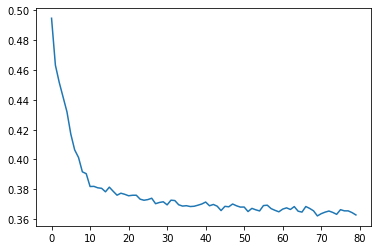

In [21]:
import matplotlib.pyplot as plt
plt.plot(model.history['val_loss'])

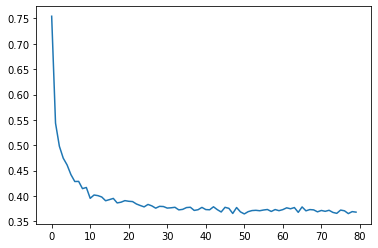

In [22]:
plt.plot(model.history['loss'])

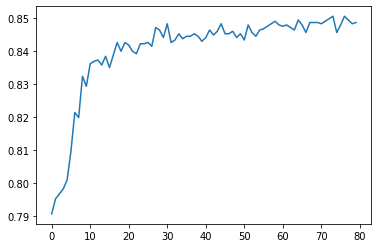

In [23]:
plt.plot(model.history['val_accuracy'])

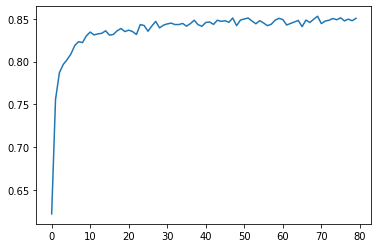

In [24]:
plt.plot(model.history['accuracy'])

In [25]:
#prediction of test sets

prediction = classifier.predict(X_test)
prediction = (prediction > 0.5)
print(prediction)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [26]:
#the confusion matrix

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, prediction)
print(matrix)

[[1562   33]
 [ 228  177]]


In [27]:
#accuracy calculation

from sklearn.metrics import accuracy_score
score=accuracy_score(prediction, y_test)
print(score)

0.8695
